## IMPORT LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


import nltk
from nltk.corpus import stopwords
from termcolor import colored
stops = set(stopwords.words("english")) 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/opt/anaconda3/envs/rec_sys/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### TENSORFLOW VERSION ENSURE IT TO BE ANYTHING ABOVE 2.3

In [6]:
print(('Your TensorFlow version: {0}').format(tf.__version__))

Your TensorFlow version: 2.3.0


### Load File

In [7]:
df=pd.read_csv("tweets.csv")

In [8]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [9]:
df.columns  #check the columns
print(colored("Total Number of columns","red"),colored(len(df.columns),"blue"))

Total Number of columns 15


In [11]:
print(colored("Total Number of columns","red"),colored(len(df),"blue"))

Total Number of columns 14640


### Percentage of missing values in each column

In [12]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [13]:
missing_value_df

,column_name,percent_missing
tweet_id,tweet_id,0.000000
airline_sentiment,airline_sentiment,0.000000
airline_sentiment_confidence,airline_sentiment_confidence,0.000000
negativereason,negativereason,37.308743
negativereason_confidence,negativereason_confidence,28.128415
airline,airline,0.000000
airline_sentiment_gold,airline_sentiment_gold,99.726776
name,name,0.000000
negativereason_gold,negativereason_gold,99.781421
retweet_count,retweet_count,0.000000


In [14]:
# straight away remove columns where maximum values are missing
df.drop(["airline_sentiment_gold","negativereason_gold","tweet_coord"],axis=1,inplace=True)

In [15]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### PLOT THE HISTOGRAM IF THERE ARE CONTINOUS VALUES 

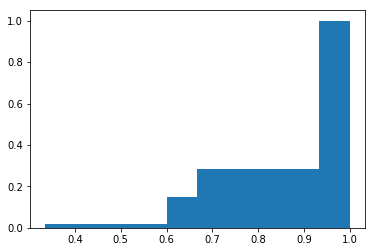

In [11]:
plt.hist(df["airline_sentiment_confidence"],cumulative=True, density=True, bins=10);

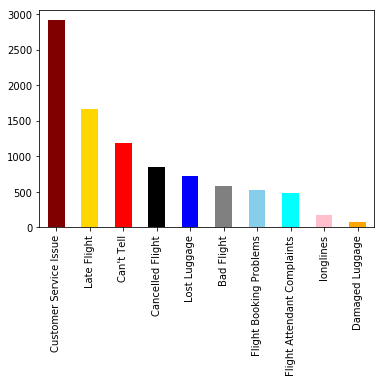

In [12]:
df["negativereason"].value_counts().plot(kind="bar",color=["maroon","gold","red","black","blue","grey","skyblue","cyan","pink","orange"])

/opt/anaconda3/envs/rec_sys/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/rec_sys/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


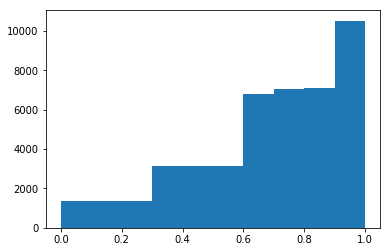

In [13]:
# df["negativereason_confidence"].plot(kind="hist")
plt.hist(df["negativereason_confidence"],cumulative=True, bins=10);

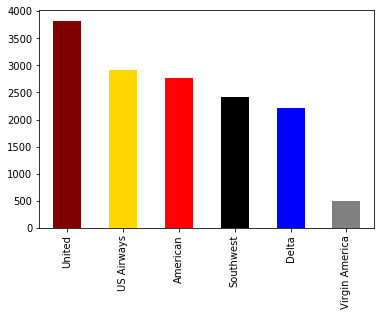

In [14]:
df["airline"].value_counts().plot(kind="bar",color=["maroon","gold","red","black","blue","grey"])

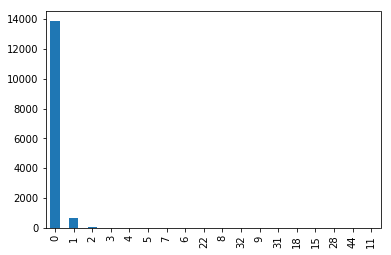

In [15]:
df["retweet_count"].value_counts().plot(kind="bar")

In [16]:
df["text"].iloc[1]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [17]:
df["tweet_created"].iloc[0]

'2015-02-24 11:35:52 -0800'

In [18]:
df["tweet_location"].iloc[10]

'1/1 loner squad'

In [19]:
df["user_timezone"].iloc[0]

'Eastern Time (US & Canada)'

In [20]:
#let's check which airline has what kind of reviews more

In [21]:
df.groupby("airline")["airline_sentiment"].value_counts(ascending=True)

airline         airline_sentiment
American        positive             336 
                neutral              463 
                negative             1960
Delta           positive             544 
                neutral              723 
                negative             955 
Southwest       positive             570 
                neutral              664 
                negative             1186
US Airways      positive             269 
                neutral              381 
                negative             2263
United          positive             492 
                neutral              697 
                negative             2633
Virgin America  positive             152 
                neutral              171 
                negative             181 
Name: airline_sentiment, dtype: int64

### pd.crosstab is used to compute frequency of table

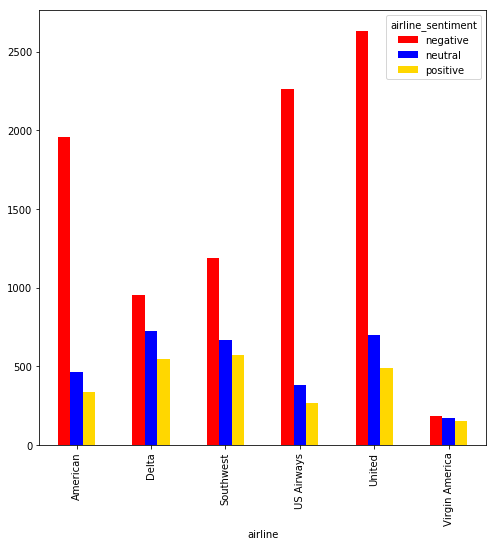

In [16]:
pd.crosstab(df['airline'],df['airline_sentiment']).plot.bar(figsize=(8,8),color=['red', 'blue', 'gold'])


In [17]:
#we saw the united and us airways did bad performance

In [18]:
negativereasons=pd.crosstab(df["airline"],df["negativereason"])

In [19]:
negativereasons

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,246,768,12,87,130,249,149,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


In [20]:
negativereasons.style.highlight_max(color = 'lightgreen', axis = 1)

negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
airline,,,,,,,,,,
American,87,198,246,768,12,87,130,249,149,34
Delta,64,186,51,199,11,60,44,269,57,14
Southwest,90,159,162,391,14,38,61,152,90,29
US Airways,104,246,189,811,11,123,122,453,154,50
United,216,379,181,681,22,168,144,525,269,48
Virgin America,19,22,18,60,4,5,28,17,5,3


## let's check if specific date people tweeted bad reviews

In [21]:

df["tweet_created"].iloc[0]
#lets try to remove the time part

'2015-02-24 11:35:52 -0800'

In [22]:
df["Date_only"]=pd.DatetimeIndex(df["tweet_created"]).date
df["Date_only"]=df["Date_only"].apply(lambda x: x.strftime('%d-%m-%Y'))

In [23]:
df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,Date_only
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),24-02-2015
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials to the experience... tacky.,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),24-02-2015


In [24]:
date_variation=pd.crosstab(df["Date_only"],df["airline"])

In [25]:
date_variation.style.highlight_max(color = 'red', axis = 0)

airline,American,Delta,Southwest,US Airways,United,Virgin America
Date_only,,,,,,
16-02-2015,0,2,0,0,2,0
17-02-2015,0,263,384,311,396,54
18-02-2015,1,268,292,317,406,60
19-02-2015,1,283,317,279,426,70
20-02-2015,1,251,319,333,526,70
21-02-2015,1,243,370,360,506,77
22-02-2015,988,408,279,648,703,53
23-02-2015,1141,391,276,488,641,91
24-02-2015,626,113,183,177,216,29


In [26]:
df["Date_only"].min()

'16-02-2015'

In [27]:
df["Date_only"].max()

'24-02-2015'

In [28]:
final=df[["text","airline_sentiment"]]

In [29]:
final.head(2)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive


# cleaning part

In [30]:
import re
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [31]:
tweet_to_words(df["text"].iloc[0])

'virginamerica dhepburn said'

In [32]:
df["text"].iloc[0]

'@VirginAmerica What @dhepburn said.'

In [33]:
final['clean_tweet']=final['text'].apply(lambda x: tweet_to_words(x))

/opt/anaconda3/envs/rec_sys/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
len(final)

14640

# TO CONVERT  CATEGORICAL VALUES TO NUMBERS

In [78]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
final['label'] = LE.fit_transform(final['airline_sentiment'])

/opt/anaconda3/envs/rec_sys/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final["clean_tweet"],final["label"], test_size=0.2, random_state=1)

In [80]:
X_train.iloc[0]

'united wonder cabin filthy badservice'

In [81]:
y_train.iloc[0]

0

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

X_train= vec.fit_transform(X_train)
X_test=vec.transform(X_test)

In [83]:
X_train.sort_indices()
X_test.sort_indices()

In [84]:
X_train.indices

array([  814,  1408,  3688, ...,  9101, 10613, 10751], dtype=int32)

In [85]:
X_train.has_sorted_indices

True

### Let's check for first example and see how tfidf values are coming in tfidf

In [86]:
first_vector_tfidfvectorizer=X_train[0]

In [87]:
first_vector_tfidfvectorizer # as we discussed the results will be in sparse matrix

<1x11881 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

## To ARRAY CONVERTS TO ARRAY 

In [88]:
first_vector_tfidfvectorizer.T.toarray() #convert to array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

## TO DENSE CONVERTS TO DENSE

In [89]:
first_vector_tfidfvectorizer.T.todense() #converts matrix

matrix([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [90]:
first_vector_tfidfvectorizer=X_train[0]
test_tfidf = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=vec.get_feature_names(), 
                  columns=["tfidf"])
test_tfidf.sort_values(by=["tfidf"],ascending=False)

,tfidf
filthy,0.577849
wonder,0.481823
badservice,0.473499
cabin,0.434314
united,0.145281
preflight,0.000000
pref,0.000000
prefer,0.000000
preferably,0.000000
preference,0.000000


In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [92]:
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 11712
# Test data samples: 2928


## Let's check properly the shapes now let's not do the mistake here

In [93]:
X_train.shape

(11712, 11881)

In [94]:
X_test.shape # check the column value which indicates the vocabulary  it should be same as train

(2928, 11881)

In [95]:
y_train.shape

(11712,)

In [96]:
y_train.shape

(11712,)

## As we know the results of tfidf are scipy matrix we are converting to dense matrix using todense

In [97]:
import scipy

X_train = scipy.sparse.csr_matrix.todense(X_train)
X_test = scipy.sparse.csr_matrix.todense(X_test)
y_train=tf.keras.utils.to_categorical(y_train, num_classes=3, dtype='float32')
y_test=tf.keras.utils.to_categorical(y_test, num_classes=3, dtype='float32')



# Training for 64 samples in this step below cells i have done for complete data


In [98]:
# Let's check for 64 samples

In [99]:
base_model = tf.keras.Sequential()
base_model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],))),
base_model.add(tf.keras.layers.Dense(64, activation='relu'))
base_model.add(tf.keras.layers.Dense(3, activation='softmax'))
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                760448    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 764,803
Trainable params: 764,803
Non-trainable params: 0
_________________________________________________________________


In [100]:
base_model.compile(optimizer='adam'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
history =base_model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
366/366 - 1s - loss: 0.6701 - accuracy: 0.7234 - val_loss: 0.5073 - val_accuracy: 0.7941
Epoch 2/10
366/366 - 1s - loss: 0.3460 - accuracy: 0.8712 - val_loss: 0.5669 - val_accuracy: 0.7828
Epoch 3/10
366/366 - 1s - loss: 0.2034 - accuracy: 0.9312 - val_loss: 0.6525 - val_accuracy: 0.7698
Epoch 4/10
366/366 - 1s - loss: 0.1364 - accuracy: 0.9553 - val_loss: 0.7873 - val_accuracy: 0.7681
Epoch 5/10
366/366 - 1s - loss: 0.0955 - accuracy: 0.9678 - val_loss: 0.8825 - val_accuracy: 0.7575
Epoch 6/10
366/366 - 1s - loss: 0.0711 - accuracy: 0.9774 - val_loss: 0.9910 - val_accuracy: 0.7572
Epoch 7/10
366/366 - 1s - loss: 0.0515 - accuracy: 0.9837 - val_loss: 1.0870 - val_accuracy: 0.7524
Epoch 8/10
366/366 - 1s - loss: 0.0378 - accuracy: 0.9880 - val_loss: 1.2106 - val_accuracy: 0.7568
Epoch 9/10
366/366 - 1s - loss: 0.0319 - accuracy: 0.9908 - val_loss: 1.2756 - val_accuracy: 0.7548
Epoch 10/10
366/366 - 1s - loss: 0.0254 - accuracy: 0.9921 - val_loss: 1.3366 - val_accuracy: 0.7561

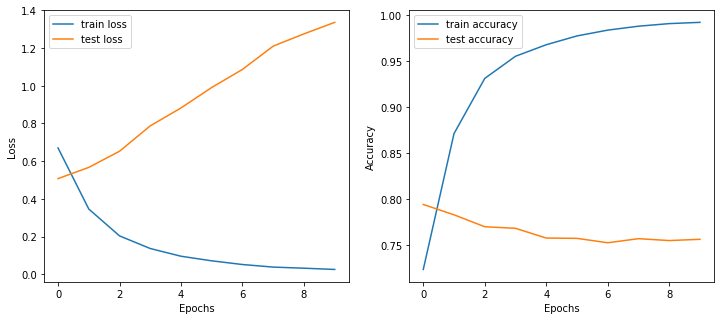

In [101]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss']);
ax = plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy']);

In [102]:
training_loss: 0.0301
test_loss:1.3213

### From the above graph 
for 64 samples the the 
train loss decreased 
but testing loss increased 



# If your training loss is much lower than validation loss then this means the neural network might be overfitting . 


## Solutions to this are to decrease your network size, or to increase dropout.But already our network size is small hence we have to do dropout which we will do in next class

In [77]:
base_model.evaluate(x_test,y_test) # gives the loss and accuracy for testing data which we gave

92/92 [==============================] - 0s 1ms/step - loss: 1.3213 - accuracy: 0.7520


[1.3213074207305908, 0.7520492076873779]

In [106]:
base_complete_data_model=tf.keras.Sequential()
base_complete_data_model.add(tf.keras.layers.Dense(X_train.shape[0],activation='relu',input_shape=(X_train.shape[1],)))
base_complete_data_model.add(tf.keras.layers.Dense(64,activation="relu"))
base_complete_data_model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [107]:
base_complete_data_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 11712)             139161984 
_________________________________________________________________
dense_10 (Dense)             (None, 64)                749632    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 139,911,811
Trainable params: 139,911,811
Non-trainable params: 0
_________________________________________________________________


In [108]:
base_complete_data_model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])

In [110]:
history2=base_complete_data_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=2)

Epoch 1/10
366/366 - 224s - loss: 0.6019 - accuracy: 0.7576 - val_loss: 0.5199 - val_accuracy: 0.7845
Epoch 2/10
366/366 - 259s - loss: 0.2362 - accuracy: 0.9147 - val_loss: 0.6522 - val_accuracy: 0.7821
Epoch 3/10
366/366 - 221s - loss: 0.0726 - accuracy: 0.9757 - val_loss: 0.9218 - val_accuracy: 0.7760
Epoch 4/10
366/366 - 236s - loss: 0.0310 - accuracy: 0.9905 - val_loss: 1.0248 - val_accuracy: 0.7739
Epoch 5/10
366/366 - 237s - loss: 0.0204 - accuracy: 0.9927 - val_loss: 1.1422 - val_accuracy: 0.7766
Epoch 6/10
366/366 - 230s - loss: 0.0146 - accuracy: 0.9946 - val_loss: 1.1711 - val_accuracy: 0.7777
Epoch 7/10
366/366 - 233s - loss: 0.0129 - accuracy: 0.9939 - val_loss: 1.2394 - val_accuracy: 0.7756
Epoch 8/10
366/366 - 237s - loss: 0.0108 - accuracy: 0.9946 - val_loss: 1.2265 - val_accuracy: 0.7770
Epoch 9/10
366/366 - 246s - loss: 0.0106 - accuracy: 0.9953 - val_loss: 1.2697 - val_accuracy: 0.7766
Epoch 10/10
366/366 - 247s - loss: 0.0104 - accuracy: 0.9949 - val_loss: 1.3001 - 

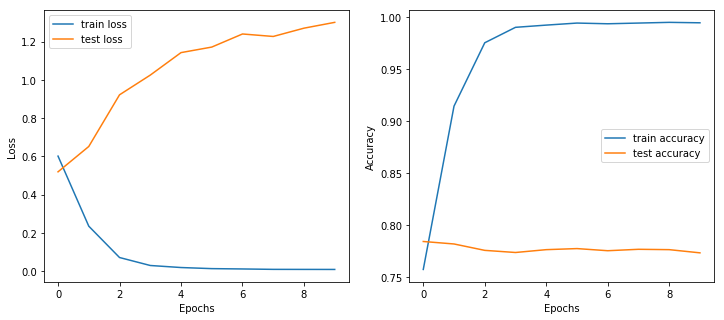

In [111]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss']);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss']);
ax = plt.subplot(122)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy']);

## Save the model

In [105]:
base_complete_data_model.save('base_complete_data_model.h5')

# What is HDF5 ?
## HDF5 allows you to store large amounts of data efficiently
Each HDF5 file has an internal structure that allows you to search for a specific dataset. You can think of it as a single file with its hierarchical structure, just like a collection of folders and subfolders

# Let's save our tfidf dictionary and weights as well incase we need to predict for different example 
we wont be training tfidf model again in case if we want to predict for new data which is not in test or train

In [104]:
import pickle # pickle

pickle.dump(vec, open("tfidf_weights.pkl", "wb"))

# What is pickle?

## PythonServer Side ProgrammingProgramming. Python pickle module is used for serializing and de-serializing python object structures. The process to converts any kind of python objects (list, dict, etc.) into byte streams (0s and 1s) is called pickling or serialization or flattening or marshalling.

In [121]:
drop_model = tf.keras.Sequential()
drop_model.add(tf.keras.layers.Dense(X_train.shape[0], activation='relu', input_shape=(X_train.shape[1],))) #input
drop_model.add(tf.keras.layers.Dropout(0.5))
drop_model.add(tf.keras.layers.Dense(64, activation='relu')) # hidden layer
drop_model.add(tf.keras.layers.Dropout(0.5))
drop_model.add(tf.keras.layers.Dense(3, activation='softmax'))
drop_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 11712)             139161984 
_________________________________________________________________
dropout_2 (Dropout)          (None, 11712)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                749632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 195       
Total params: 139,911,811
Trainable params: 139,911,811
Non-trainable params: 0
_________________________________________________________________


In [124]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
drop_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
drop_model.summary()
history3=drop_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 11712)             139161984 
_________________________________________________________________
dropout_2 (Dropout)          (None, 11712)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                749632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 195       
Total params: 139,911,811
Trainable params: 139,911,811
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
366/366 - 234s - loss: 0.7449 - accuracy: 0.7006 - val_loss: 0.5921 - val_accuracy: 0.7401
Epoc

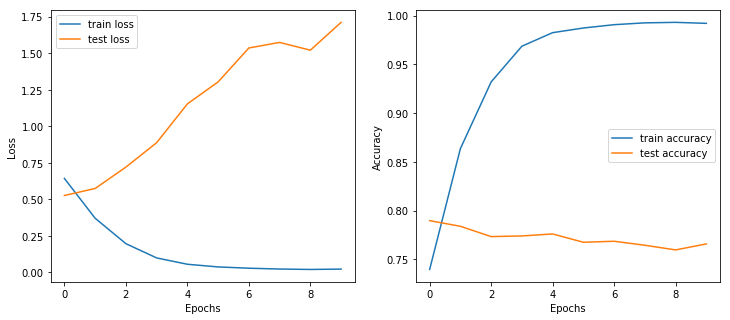

In [114]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss']);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss']);
ax = plt.subplot(122)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy']);

In [115]:
results2 = drop_model.evaluate(X_test, y_test) # val_loss: 1.3001 - val_accuracy: 0.7736 #increase the epochs

92/92 [==============================] - 1s 11ms/step - loss: 1.7118 - accuracy: 0.7657


In [117]:
from IPython.display import Image
Image(url='https://i.chzbgr.com/full/5851069184/hE826B733/hurry-up-man') 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 11712)             139161984 
_________________________________________________________________
dense_19 (Dense)             (None, 64)                749632    
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 195       
Total params: 139,911,811
Trainable params: 139,911,811
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 11712)             139161984 
_________________________________________________________________
dense_19 (Dense)             (None, 64)                749632    
__________________

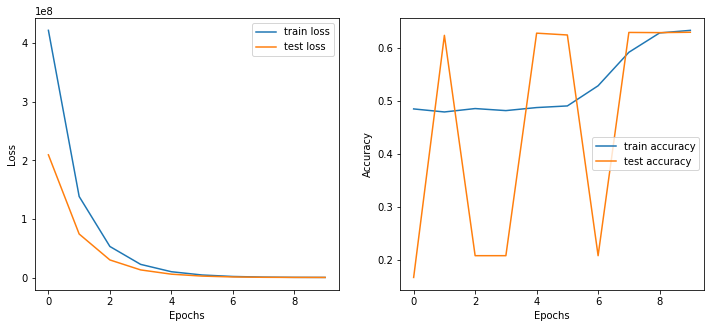

In [119]:
reg_model = Sequential([Dense(X_train.shape[0], activation='relu',input_shape=(X_train.shape[1],), kernel_initializer='ones',kernel_regularizer=tf.keras.regularizers.L1(0.01),activity_regularizer=tf.keras.regularizers.L2(0.01)),
                        Dense(64, activation='relu', kernel_initializer='ones',kernel_regularizer=tf.keras.regularizers.L1(0.01),activity_regularizer=tf.keras.regularizers.L2(0.01)),
                        Dense(3, activation='softmax')])
reg_model.summary()

reg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
reg_model.summary()
history4=reg_model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),verbose=2)




plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss']);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss']);
ax = plt.subplot(122)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy']);

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 11712)             139161984 
_________________________________________________________________
dense_22 (Dense)             (None, 64)                749632    
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 195       
Total params: 139,911,811
Trainable params: 139,911,811
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
366/366 [==============================] - 250s 684ms/step - loss: 0.6027 - accuracy: 0.7576 - val_loss: 0.5217 - val_accuracy: 0.7906
Epoch 2/10
366/366 [==============================] - 250s 683ms/step - loss: 0.2392 - accuracy: 0.9101 - val_loss: 0.6425 - val_accuracy: 0.7852
Epoch 00002: early stopping


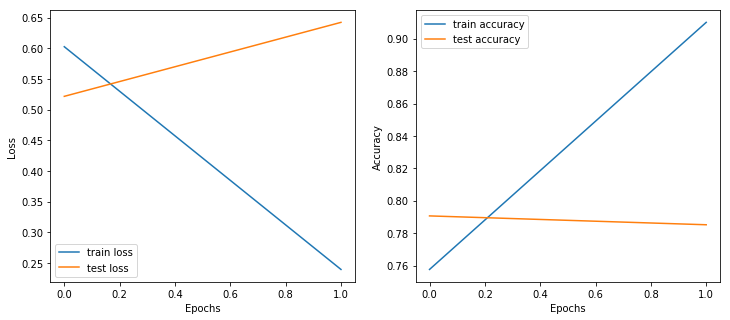

In [120]:
from tensorflow.keras.callbacks import EarlyStopping
es_model = Sequential([Dense(X_train.shape[0], activation='relu',input_shape=(X_train.shape[1],),),
                        Dense(64, activation='relu',),
                        Dense(3, activation='softmax')])
es_model.summary()




# simple early stopping
early_call = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

es_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history5 = es_model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=10,callbacks=[early_call])


plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss']);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss']);
ax = plt.subplot(122)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy']);

In [ ]:
Interpretting

 loss > validation_loss  [under fitting]
 loss << validation_loss  [over fitting]
 loss= validation_loss [fitting]
    

In [ ]:
fantastic in testing # vocabulary

train_Data_0="this air lines are ok for me.I will try to give 4 star rating"
train_data_1="this airlines are good serivice is helping"
test_data_0="I complete like this airlines when i come next time i will definitely try this"
tfidf.tranform=[0,0,0,0,0,0,0]=
# vocabulary=["good"]

In [ ]:
#test.transform([0])

#limitatuons of tfidf --->what will be do be in text Nlp
#how we will do neural networks---->

In [ ]:
# hyper parameter

1)learning rate
2)regularization
3)epoch
4)dropout
5)optimizers
6)activation
7)number of hidden layers
8)how many neurons in each hidden layer
9)
10)Early stopping



1)number of hidden layers
2)how many neurons in each hidden layer
3)activation function in the hidden layer
4)loss function is also hyperparamter 
5)optimizers and learning rate  
6) Dropout and regularization
7)Epochs - 5


In [ ]:
#number of neurons in the input ====no.of samples in the train
# first hidden layer -90 neurons in second hidden layer -45
#